## Busqueda Binaria y Terciara

#### Dado una lista ordenada y un elemento
#### Devolver si el elemento esta en lista

In [48]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import math

In [49]:
def busqueda_binaria(xs, e):
    if len(xs) <= 1: # O(1)
        return len(xs) == 1 and xs[0] == e # O(1)
    middle = math.floor(len(xs)/2) # O(1)
    left = xs[slice(0, middle)] # O(1)
    right = xs[slice(middle, len(xs))] # O(1)
    if e < xs[middle]: # O(1)
        return busqueda_binaria(left, e) 
    return busqueda_binaria(right, e)
print(busqueda_binaria([1], 2))
print(busqueda_binaria([2], 2))
print(busqueda_binaria([1,2,3,4,5,6], 2))
print(busqueda_binaria([1,2,3,4,5,6], 6))
print(busqueda_binaria([1,2,3,4,5,6], 7))

False
True
True
True
False


#### a = 1, b = 2, f(n) = O(1)
#### log_b(a) = 0
#### n^log_2(1) = 1

#### f(n) = n^log_b(a) entonces estamos en el caso 2

#### T(n) = Theta(log(n) * n^log_b(a))

#### O(log(n))

In [50]:
def busqueda_ternaria(xs, e):
    if(len(xs) <= 2): # O(1)
        return (len(xs) == 1 and xs[0] == e) or (len(xs) == 2 and xs[1] == e) # O(1)
    unTercio = math.floor(len(xs)/3) # O(1)
    dosTercios = math.floor(len(xs)*2/3) # O(1)
    fisrtPart = xs[slice(0, unTercio)] # O(1)
    secondPart = xs[slice(unTercio, dosTercios)] # O(1)
    thirdPart = xs[slice(dosTercios, len(xs))] # O(1)
    if e < xs[unTercio]: # O(1)
        return busqueda_ternaria(fisrtPart, e)
    if e < xs[dosTercios]: # O(1)
        return busqueda_ternaria(secondPart, e)
    return busqueda_ternaria(thirdPart, e)
print(busqueda_binaria([1], 2))
print(busqueda_binaria([2], 2))
print(busqueda_binaria([1,2,3,4,5,6], 2))
print(busqueda_binaria([1,2,3,4,5,6], 6))
print(busqueda_binaria([1,2,3,4,5,6], 7))

False
True
True
True
False


#### a = 1, b = 3, f(n) = O(1)
#### log_b(a) = 0
#### n^log_3(1) = 1

#### f(n) = n^log_b(a) entonces estamos en el caso 2

#### T(n) = Theta(log(n) * n^log_b(a))

#### O(log(n))

## Timing

In [51]:
def microbench(callable_obj, plt, label, n_max = 100, st = 1):
    n_min = 1 
    st = 1
    sz = 5 # iteraciones del benchmark

    t_quick_2 = list()
    for n in range(n_min, n_max, st):
        v = random.sample(range(1, 1000000), n)
        t_quick_2.append(timeit.timeit(lambda: callable_obj(v), number = sz))

    plt.plot(list(range(n_min, n_max)), t_quick_2, label= label + '; step = ' + str(st))
    plt.xlabel('n')
    plt.ylabel('costo')
    plt.legend()
    
    return plt

In [52]:
n_min = 1
n_max = 1000
st = 10
iteraciones = 10 # iteraciones del benchmark
e = 1

y_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: busqueda_binaria(v, e), number = 1)
    promedio = suma / iteraciones
    y_binaria.append(promedio)

y_terciaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: busqueda_ternaria(v, e), number = 1)
    promedio = suma / iteraciones
    y_terciaria.append(promedio)

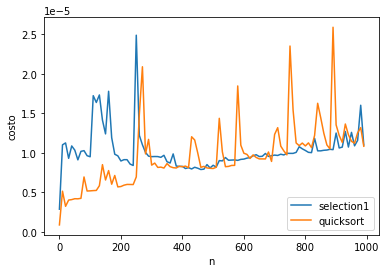

In [53]:
eje_x = list(range(n_min, n_max, st))
plt.xlabel('n')
plt.ylabel('costo')

plt.plot(eje_x, y_binaria, label = 'busqueda binaria')
plt.plot(eje_x, y_terciaria, label = 'busqueda ternaria')
plt.legend()